# Import Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, pytz
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Data Loading

In [39]:
df= pd.read_csv(r'C:\Users\LENOVO\Desktop\DATA SCIENCE\Data_Hacktiv\second question\Binance_BTCUSDT_d.csv')

In [40]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.657066e+12,2022-07-06 00:00:00,BTC/USDT,20175.84,20265.28,20174.46,20213.78,809.73146,1.637333e+07,12394.0
1,1.656979e+12,2022-07-05 00:00:00,BTC/USDT,20236.71,20750.00,19304.40,20175.83,96041.13756,1.919950e+09,1612273.0
2,1.656893e+12,2022-07-04 00:00:00,BTC/USDT,19315.83,20354.01,19055.31,20236.71,74814.04601,1.470988e+09,1282843.0
3,1.656806e+12,2022-07-03 00:00:00,BTC/USDT,19252.82,19647.63,18781.00,19315.83,51087.46631,9.802559e+08,880786.0
4,1.656720e+12,2022-07-02 00:00:00,BTC/USDT,19279.80,19467.39,18977.01,19252.81,46180.30210,8.884155e+08,833508.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1786 non-null   float64
 1   date         1786 non-null   object 
 2   symbol       1786 non-null   object 
 3   open         1786 non-null   float64
 4   high         1786 non-null   float64
 5   low          1786 non-null   float64
 6   close        1786 non-null   float64
 7   Volume BTC   1786 non-null   float64
 8   Volume USDT  1786 non-null   float64
 9   tradecount   1662 non-null   float64
dtypes: float64(8), object(2)
memory usage: 139.7+ KB


In [42]:
df.isnull().sum()

unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume BTC     0
Volume USDT    0
tradecount     0
dtype: int64

In [45]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1.662000e+03,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1.662000e+03
mean,1.585310e+12,20338.630933,20913.590307,19665.545415,20339.513983,54768.683564,1.219983e+09,8.633639e+05
std,4.146529e+10,17788.170537,18282.903665,17214.898884,17788.240188,35422.195051,1.408560e+09,7.456103e+05
min,1.513555e+12,3211.710000,3276.500000,3156.260000,3211.720000,809.731460,1.177017e+07,1.239400e+04
25%,1.549433e+12,7365.665000,7570.820000,7210.250000,7364.950000,31968.945534,2.631653e+08,2.774082e+05
50%,1.585310e+12,10221.185000,10438.500000,9880.375000,10221.140000,46100.888386,5.421902e+08,6.124865e+05
75%,1.621188e+12,36526.055000,37675.957500,34663.252500,36526.055000,67041.308437,1.861167e+09,1.252174e+06
max,1.657066e+12,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06


In [46]:
df['date'] =  pd.to_datetime(df['date'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 1661
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   unix         1662 non-null   float64       
 1   date         1662 non-null   datetime64[ns]
 2   symbol       1662 non-null   object        
 3   open         1662 non-null   float64       
 4   high         1662 non-null   float64       
 5   low          1662 non-null   float64       
 6   close        1662 non-null   float64       
 7   Volume BTC   1662 non-null   float64       
 8   Volume USDT  1662 non-null   float64       
 9   tradecount   1662 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 142.8+ KB


In [48]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.657066e+12,2022-07-06,BTC/USDT,20175.84,20265.28,20174.46,20213.78,809.73146,1.637333e+07,12394.0
1,1.656979e+12,2022-07-05,BTC/USDT,20236.71,20750.00,19304.40,20175.83,96041.13756,1.919950e+09,1612273.0
2,1.656893e+12,2022-07-04,BTC/USDT,19315.83,20354.01,19055.31,20236.71,74814.04601,1.470988e+09,1282843.0
3,1.656806e+12,2022-07-03,BTC/USDT,19252.82,19647.63,18781.00,19315.83,51087.46631,9.802559e+08,880786.0
4,1.656720e+12,2022-07-02,BTC/USDT,19279.80,19467.39,18977.01,19252.81,46180.30210,8.884155e+08,833508.0


In [49]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1657,1.513901e+12,2017-12-22,BTC/USDT,15514.03,15699.34,10961.00,13326.61,36076.271175,4.775099e+08,243261.0
1658,1.513814e+12,2017-12-21,BTC/USDT,16480.52,17309.50,14022.00,15492.64,20324.217300,3.201768e+08,117731.0
1659,1.513728e+12,2017-12-20,BTC/USDT,17295.20,17720.35,14777.66,16488.98,13450.496693,2.211939e+08,129762.0
1660,1.513642e+12,2017-12-19,BTC/USDT,18856.25,18950.00,16300.00,17295.20,13210.748220,2.327906e+08,116569.0
1661,1.513555e+12,2017-12-18,BTC/USDT,18860.04,19300.00,17029.98,18856.25,10624.633071,1.963392e+08,91956.0


# EDA

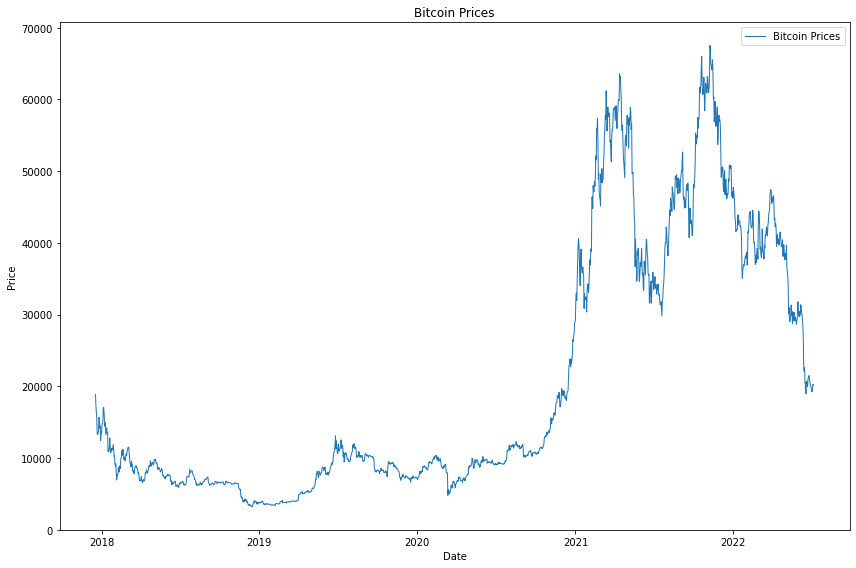

In [50]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df.date, df.close, label='Bitcoin Prices', 
         linewidth=1)

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')


plt.legend()


plt.tight_layout()

plt.show() 




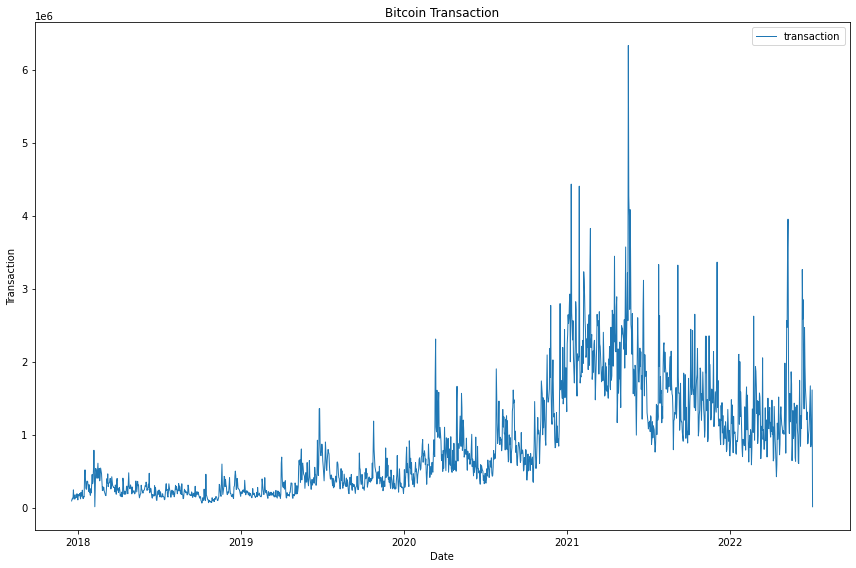

In [51]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df.date, df.tradecount, label='transaction', 
         linewidth=1)

plt.title('Bitcoin Transaction')
plt.xlabel('Date')
plt.ylabel('Transaction')


plt.legend()


plt.tight_layout()


plt.show() 

# Model Definition

In [52]:
model_lin_reg =LinearRegression()

In [53]:
# Hyper parameter yang digunakan adalah 'close'
y = df['close']
X = df.drop('close', axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=21)

In [55]:
print(X_train.shape)
print(X_test.shape)

(1246, 9)
(416, 9)


In [56]:
linear = linear_model.LinearRegression()

# Model Training

In [57]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print('Numeric Columns:', num_columns)
print('categorical Columns:', cat_columns)

Numeric Columns: ['unix', 'open', 'high', 'low', 'Volume BTC', 'Volume USDT', 'tradecount']
categorical Columns: ['symbol']


In [58]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [59]:
scaler = MinMaxScaler ()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled= scaler.transform(X_test_num)
X_train_num_scaled

array([[0.32630945, 0.07643626, 0.07633732, ..., 0.07388796, 0.01757384,
        0.05204451],
       [0.61890427, 0.12565687, 0.1240526 , ..., 0.07034052, 0.02362687,
        0.07870646],
       [0.02408188, 0.12248152, 0.12717256, ..., 0.0449711 , 0.01491862,
        0.03087423],
       ...,
       [0.53521975, 0.08561776, 0.08653182, ..., 0.15452273, 0.04023304,
        0.11413212],
       [0.25888019, 0.01178637, 0.01099565, ..., 0.07547275, 0.00823888,
        0.03120547],
       [0.4166165 , 0.08703331, 0.08908151, ..., 0.08373935, 0.02194775,
        0.05753618]])

In [60]:
encoder =OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded=encoder.transform(X_test_cat)
X_train_cat_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [61]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final_df=pd.DataFrame(X_train_final,columns=[num_columns+cat_columns])
X_train_final_df

,unix,open,high,low,Volume BTC,Volume USDT,tradecount,symbol
0,0.326309,0.076436,0.076337,0.076528,0.073888,0.017574,0.052045,0.0
1,0.618904,0.125657,0.124053,0.127466,0.070341,0.023627,0.078706,0.0
2,0.024082,0.122482,0.127173,0.121465,0.044971,0.014919,0.030874,0.0
3,0.128236,0.064841,0.065173,0.064788,0.100671,0.021790,0.035324,0.0
4,0.347381,0.100400,0.114054,0.096230,0.197995,0.059116,0.114332,0.0
...,...,...,...,...,...,...,...,...
1241,0.778447,0.475398,0.481716,0.477989,0.105221,0.108916,0.168688,0.0
1242,0.971102,0.396548,0.414744,0.404614,0.167088,0.148715,0.292528,0.0
1243,0.535220,0.085618,0.086532,0.086565,0.154523,0.040233,0.114132,0.0
1244,0.258880,0.011786,0.010996,0.011343,0.075473,0.008239,0.031205,0.0


In [62]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [63]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_final,y_train)

print(model.intercept_)
print(model.coef_)

3310.7180676947355
[  -101.41974356 -32943.07612303  61105.19936364  36248.74420088
   -876.90970297  -1651.30398118   1903.2461953       0.        ]


In [64]:
X_train_final_df.columns

MultiIndex([(       'unix',),
            (       'open',),
            (       'high',),
            (        'low',),
            ( 'Volume BTC',),
            ('Volume USDT',),
            ( 'tradecount',),
            (     'symbol',)],
           )

# Model Evaluation

In [65]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

print('r2score',r2_score(y_train,y_pred_train))
print('r2score',r2_score(y_test,y_pred_test))

r2score 0.9993913435726103
r2score 0.9993058622454909


# Model Inference

In [66]:
data_inf= df.sample(10, random_state=21)
data_inf.reset_index(drop=True,inplace=True)

In [67]:
data_inf

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.600214e+12,2020-09-16,BTC/USDT,10785.23,11093.00,10661.22,10954.01,64991.512440,7.086450e+08,884153.0
1,1.571962e+12,2019-10-25,BTC/USDT,7412.41,8799.00,7361.00,8655.02,90748.218174,7.373295e+08,775418.0
2,1.537402e+12,2018-09-20,BTC/USDT,6392.00,6540.00,6325.00,6492.00,25189.024728,1.618443e+08,153686.0
3,1.636589e+12,2021-11-11,BTC/USDT,64882.42,65600.07,64100.00,64774.26,37237.980580,2.415537e+09,1327827.0
4,1.569370e+12,2019-09-25,BTC/USDT,8497.55,8730.00,8215.64,8430.05,60783.892258,5.124372e+08,544806.0
5,1.639699e+12,2021-12-17,BTC/USDT,47632.38,47995.96,45456.00,46131.20,43104.488700,2.015966e+09,1261780.0
6,1.581552e+12,2020-02-13,BTC/USDT,10325.33,10500.00,10080.00,10229.63,79344.358759,8.155075e+08,932802.0
7,1.541030e+12,2018-11-01,BTC/USDT,6369.52,6442.65,6348.66,6410.00,9099.035841,5.803169e+07,89601.0
8,1.595549e+12,2020-07-24,BTC/USDT,9603.27,9637.00,9463.44,9537.80,43931.136205,4.192403e+08,677725.0
9,1.615766e+12,2021-03-15,BTC/USDT,58976.08,60633.43,54600.00,55605.20,102771.427298,5.874241e+09,2683815.0


In [68]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [69]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [70]:
df_inf_final= np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
df_inf_final

array([[0.6038531 , 0.1177583 , 0.1186954 , 0.11858577, 0.15989803,
        0.05175098, 0.13796563, 0.        ],
       [0.40698374, 0.06531537, 0.0837823 , 0.06623157, 0.2240665 ,
        0.05388114, 0.1207571 , 0.        ],
       [0.16616496, 0.04944934, 0.04940188, 0.04979663, 0.06073688,
        0.01114473, 0.02236104, 0.        ],
       [0.85731487, 0.9588986 , 0.94825541, 0.96633056, 0.09075481,
        0.1785074 , 0.20818201, 0.        ],
       [0.38892234, 0.08218787, 0.08273217, 0.07978945, 0.14941546,
        0.03718029, 0.08426016, 0.        ],
       [0.87898856, 0.69068312, 0.680333  , 0.67056494, 0.10537022,
        0.14883465, 0.19772933, 0.        ],
       [0.47381096, 0.11060745, 0.10967035, 0.10936538, 0.19565571,
        0.05968675, 0.14566488, 0.        ],
       [0.19145093, 0.0490998 , 0.04792028, 0.05017196, 0.0206514 ,
        0.00343545, 0.01221887, 0.        ],
       [0.57134256, 0.09938037, 0.09653608, 0.09958437, 0.10742967,
        0.03025935, 0.105296

In [71]:
y_pred_inf= model_lin_reg.predict(df_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Closed_Price_Prediction'])
y_pred_inf

,Closed_Price_Prediction
0,10958.556103
1,8582.468592
2,6459.523842
3,64628.173082
4,8479.333584
5,46385.521547
6,10291.803606
7,6420.124855
8,9543.773421
9,57427.581377


In [72]:
data_inf['Close_Price_Prediction'] = y_pred_inf

In [73]:
data_inf

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,Close_Price_Prediction
0,1.600214e+12,2020-09-16,BTC/USDT,10785.23,11093.00,10661.22,10954.01,64991.512440,7.086450e+08,884153.0,10958.556103
1,1.571962e+12,2019-10-25,BTC/USDT,7412.41,8799.00,7361.00,8655.02,90748.218174,7.373295e+08,775418.0,8582.468592
2,1.537402e+12,2018-09-20,BTC/USDT,6392.00,6540.00,6325.00,6492.00,25189.024728,1.618443e+08,153686.0,6459.523842
3,1.636589e+12,2021-11-11,BTC/USDT,64882.42,65600.07,64100.00,64774.26,37237.980580,2.415537e+09,1327827.0,64628.173082
4,1.569370e+12,2019-09-25,BTC/USDT,8497.55,8730.00,8215.64,8430.05,60783.892258,5.124372e+08,544806.0,8479.333584
5,1.639699e+12,2021-12-17,BTC/USDT,47632.38,47995.96,45456.00,46131.20,43104.488700,2.015966e+09,1261780.0,46385.521547
6,1.581552e+12,2020-02-13,BTC/USDT,10325.33,10500.00,10080.00,10229.63,79344.358759,8.155075e+08,932802.0,10291.803606
7,1.541030e+12,2018-11-01,BTC/USDT,6369.52,6442.65,6348.66,6410.00,9099.035841,5.803169e+07,89601.0,6420.124855
8,1.595549e+12,2020-07-24,BTC/USDT,9603.27,9637.00,9463.44,9537.80,43931.136205,4.192403e+08,677725.0,9543.773421
9,1.615766e+12,2021-03-15,BTC/USDT,58976.08,60633.43,54600.00,55605.20,102771.427298,5.874241e+09,2683815.0,57427.581377


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


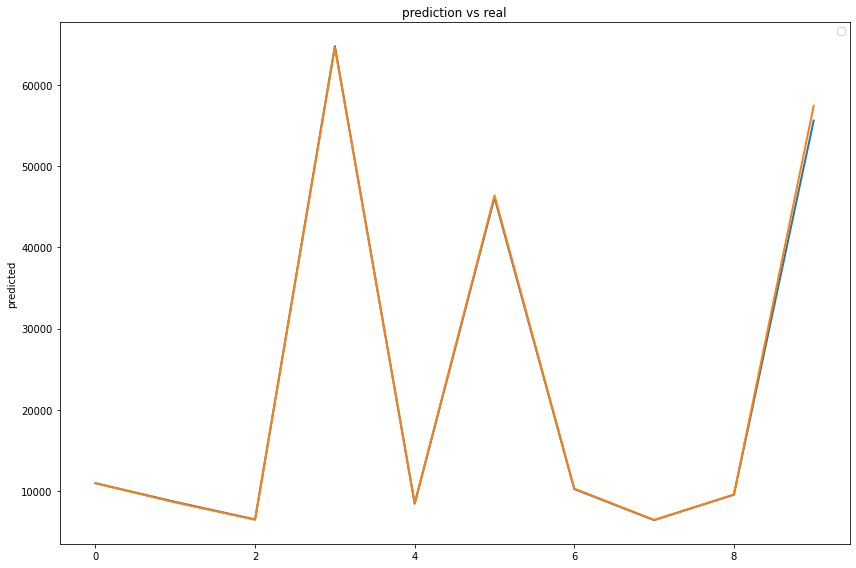

In [79]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data_inf.index, data_inf.close, data_inf.Close_Price_Prediction, 
         linewidth=2)

plt.title('prediction vs real')
plt.ylabel('real')
plt.ylabel('predicted')


plt.legend()


plt.tight_layout()


plt.show() 